#*Exercise 3:*

##*Question: 2*



##*Importing required packages*

In [ ]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets import load_wine
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def abs_mat(A):
  B=copy.deepcopy(A)
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      B[i][j]=abs(A[i][j])
  return B

##*Loading the dataset and looking at the shapes*

In [ ]:
wine = load_wine()

#check the shape of wine data
print("Shape of wine data array: ", wine.data.shape)

A = wine.data
A = A / abs_mat(A).max(axis=0)
#check the shape of wine target
print("Shape of wine target labels array: ",wine.target.shape)
unique_labels = np.unique(wine.target)
print("Unique labels in wine dataset: ", unique_labels)
#How many labels does wine data have?
C = len(unique_labels)
print("Number of labels in wine dataset: ", C)

Shape of wine data array:  (178, 13)
Shape of wine target labels array:  (178,)
Unique labels in wine dataset:  [0 1 2]
Number of labels in wine dataset:  3


##*Converting the labels to belong to {+1,-1}*

In [ ]:
#In the following code, we create a nx1 vector of target labels

y = 1.0*np.ones([A.shape[0],1])

for i in range(wine.target.shape[0]):
    if wine.target[i] != 1:
        y[i] = -1

##*Creating the training and test data sets*

In [ ]:
n = wine.data.shape[0]         ## Number of data points
d = wine.data.shape[1]         ## Dimension of data points

## Create an index array
indexarr = np.arange(n)        ## index array
np.random.shuffle(indexarr)    ## shuffle the indices
# print(indexarr) #check indexarr after shuffling

## Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data

cutoff = int(0.8*len(indexarr))
print(f"Number of observations in wine data set: {len(indexarr)}")
print(f"Number of observations in train data: {cutoff}")
print(f"Number of observations in test data: {len(indexarr) - cutoff}")

train_data = np.array([wine.data[idx] for idx in indexarr[:cutoff]])
train_label = np.array([y[idx] for idx in indexarr[:cutoff]])
test_data = np.array([wine.data[idx] for idx in indexarr[cutoff:]])
test_label = np.array([y[idx] for idx in indexarr[cutoff:]])

#Normalization
#train_data = train_data / abs_mat(train_data).max(axis=0)
#test_data = test_data / abs_mat(test_data).max(axis=0)

n1 = train_data.shape[0]

Number of observations in wine data set: 178
Number of observations in train data: 142
Number of observations in test data: 36


In [ ]:
def predict(w,x):
    return np.sign(np.dot(w.T, x))

In [ ]:
def compute_accuracy(data,labels,model_w):
    count = 0
    for i in range(data.shape[0]):
        if labels[i,:] == predict(model_w, data[i,:]):
            count = count + 1
        else:
            pass
    accuracy = count*100/data.shape[0]
    return accuracy

## *Question: 3*

In [ ]:
def compute_loss_h(w,x,y):
    return max(0, 1 - y*np.dot(w.T,x))

In [ ]:
def compute_grad_loss_h(x,y,model_w, lambda_val):
    gradients = np.zeros([model_w.shape[0],1])
    for i in range(model_w.shape[0]):
        # print((y*np.dot(model_w.T, x)).shape)
        compare_term = 1 - int(y*np.dot(model_w.T, x)) 
        if compare_term <= 0:
            gradients[i] = (lambda_val*model_w[i])
        else:
            gradients[i] = (lambda_val*model_w[i]) - model_w[i]
    
    return np.multiply(gradients, 1/n)

##*Question: 4*

In [ ]:
def check_w(w):
  sum=0
  for i in w:
    sum= sum+ abs(i)
  if sum<=1:
    return 1, sum
  else:
    return 0, sum

In [ ]:
def compute_orthogonal_projection_ex3(z):
  k, sum = check_w(z)
  if k==1:
    return z
  else:
    return z/sum

In [ ]:
def compute_objfnval(data, labels, model_w, lambda_val):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        term_2 = compute_loss_h(model_w, data_pt, label)
        f_val = f_val + term_2
    
    return term_1 + (f_val/n)

##*Question: 5*

In [ ]:
def OPT1(data,labels,lambda_val, num_epochs):
    t = 1
    
    ## Initialize w
    # w = np.ones( (data.shape[1],1) )
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs= []
    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val)
            w = compute_orthogonal_projection_ex3(np.subtract(w, np.multiply(step, g_i)))
            c = w
            #print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val))
        weights_array_epochs.append(w)
    return w, fn_vals_array, weights_array_epochs

##*Question 6:*
In OPT1, use num_epochs=500, step=$\frac{1}{t}$ . For each $\lambda \in \{10^{-3}, 10^{-2}, 0.1, 1, 10\}$, perform the following tasks:

##*Q-6: (a)*

Text(0.5, 1.0, 'Plot of Objective function valuSes every epochss')

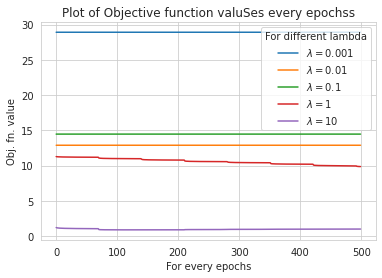

In [ ]:
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 500
w_opt = {}
fn_vals_array = {}
weights_array_epochs = {}

for lambda_val in lambda_array:
    w_opt[lambda_val], fn_vals_array[lambda_val], weights_array_epochs[lambda_val] = OPT1(train_data, train_label, lambda_val, epochs)
    plt.plot(fn_vals_array[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epochs')
plt.ylabel('Obj. fn. value')
plt.legend(title = "For different lambda")
plt.title("Plot of Objective function valuSes every epochss")

##*Q-6: (b)*

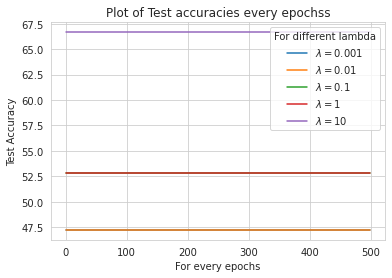

In [ ]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 500
accuracy = {}
for lambda_val in lambda_array:
    accuracy[lambda_val] = [0 for _ in range(len(weights_array_epochs[lambda_val]))] 
    
    for j in range(len(weights_array_epochs[lambda_val])):
        accuracy[lambda_val][j] = compute_accuracy(test_data, test_label, weights_array_epochs[lambda_val][j])
    plt.plot(accuracy[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epochs')
plt.ylabel('Test Accuracy')
plt.legend(title = "For different lambda")
plt.title("Plot of Test accuracies every epochss")
plt.show()

##*Q-6: (c)*

Text(0.5, 1.0, 'Plot of Train accuracies every epochs')

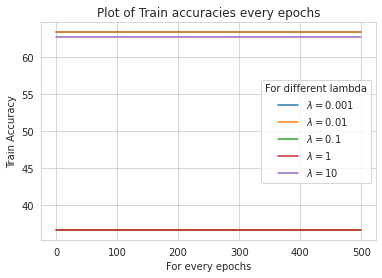

In [ ]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 500
train_accuracy = {}
for lambda_val in lambda_array:
    train_accuracy[lambda_val] = [0 for _ in range(len(weights_array_epochs[lambda_val]))]
    for j in range(len(weights_array_epochs[lambda_val])):
        train_accuracy[lambda_val][j] = compute_accuracy(train_data, train_label, weights_array_epochs[lambda_val][j])
    plt.plot(train_accuracy[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epochs')
plt.ylabel('Train Accuracy')
plt.legend(title = "For different lambda")
plt.title("Plot of Train accuracies every epochs")

##*Q-6: (d)*

In [ ]:
train_accuracy_final = [0 for _ in range(len(lambda_array))]
test_accuracy_final = [0 for _ in range(len(lambda_array))]

for j in range(len(lambda_array)):
    train_accuracy_final[j] = compute_accuracy(train_data, train_label, w_opt[lambda_array[j]])
    test_accuracy_final[j] = compute_accuracy(test_data, test_label, w_opt[lambda_array[j]])

df = pd.DataFrame(list(zip(lambda_array, train_accuracy_final, test_accuracy_final)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
df.set_index(np.arange(1,len(lambda_array)+1))

Lambda  Train Accuracy  Test Accuracy
1   0.001       63.380282      47.222222
2   0.010       63.380282      47.222222
3   0.100       36.619718      52.777778
4   1.000       36.619718      52.777778
5  10.000       62.676056      66.666667

##*Q-6: (e)*
###*Observations:*
>* Test accuracy is highest for $\lambda = 10$ which are 66.66666 and lowest for $\lambda = 0.001$ and $\lambda = 0.01$ which is 47.222222.
>* Training accuracy is highest for $\lambda = 0.001$ and $\lambda = 0.01$ which are 63.380282 and lowest for $\lambda = 0.1$ and $\lambda = 1$ which is 36.619718.

##*Question: 7*

Let us compute the gradients for the logistic functions and the squared hinge functions as well.  


- For Logistic loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} = \frac{\lambda\ w_k}{n} + \frac{1}{1+exp(-y\ w^T x_{ik})}exp(-y\ w^T x_{ik})(-y\ x_{ik})
\end{align}

- For Squared Hinge loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}[\lambda\ w_k -2(1-y\ w^T x_{ik})\ y\ x_{ik}] &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}

##*Defining the OPT1 function*

In [ ]:
def OPT1(data,labels,lambda_val, num_epochs, loss):
    t = 1
    
    ## Initialize w
    # w = np.ones( (data.shape[1],1) )
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs = []
    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val, loss)
            # print("Gradient: ", g_i)
            # Update w using w <- w - step * g_i (w)
            w = compute_orthogonal_projection_ex3(np.subtract(w, np.multiply(step, g_i)))
            # print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val, loss))
        weights_array_epochs.append(w)
    return w, fn_vals_array, weights_array_epochs

##*Defining the modified OPT1 function with our stopping criterion*

In [ ]:
logistic = 1
sq_hinge = 2

##*Defining the Compute_loss function*

In [ ]:
def compute_loss_h(w,x,y, loss):
    z = y*np.dot(w.T,x)
    if loss == logistic:
        return math.log(1+np.exp(-z))
    elif loss == sq_hinge:
        return (max(0, 1-z))**2
    else:
        raise ValueError("Loss type undefined")

##*Defining the Compute_objfnval function*

In [ ]:
def compute_objfnval(data, labels, model_w, lambda_val, loss):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        term_2 = compute_loss_h(model_w, data_pt, label, loss)
        f_val = f_val + term_2    
    return term_1 + (f_val/n)

Write an expression to compute the gradient (or sub-gradient) of $f_i(w)$ for the loss function $L_h$. Denote the gradient by $g_i(w) = \nabla_w f_i(w)$. Define a python function to compute the
gradient.

**Answer:** 
- For Hinge loss:
The gradient is computed by differentiating $f_i(w)$ w.r.t. each of the components of $w$. The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}(\lambda\ w_k -y\ x_{ik}) &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}



##*Defining the compute_grad_loss_h function*

In [ ]:
def compute_grad_loss_h(x,y,model_w, lambda_val, loss):
    gradients = np.zeros([model_w.shape[0],1])

    if loss == logistic:
        for i in range(model_w.shape[0]):
            gradients[i] = (lambda_val*model_w[i]) + ((np.exp(-y*np.dot(model_w.T,x)))*(-y*x[i]))/(1+np.exp(-y*np.dot(model_w.T,x)))[0]
        return np.multiply(gradients, 1/n)

    elif loss == sq_hinge:
        for i in range(model_w.shape[0]):
            compare_term = 1 - int(y*np.dot(model_w.T, x)) 
            if compare_term <= 0:
                gradients[i] = (lambda_val*model_w[i])
            else:
                gradients[i] = (lambda_val*model_w[i]) - (2*(1-(y*np.dot(model_w.T,x)))*y*x[i])
        return np.multiply(gradients, 1/n)
    
    else:
        raise ValueError("Loss type undefined")

##*7: (a) Plotting the objective function value every epochss. Use different colors for different $\lambda$ values.*

##*Computing the objective function value for all loss functions*

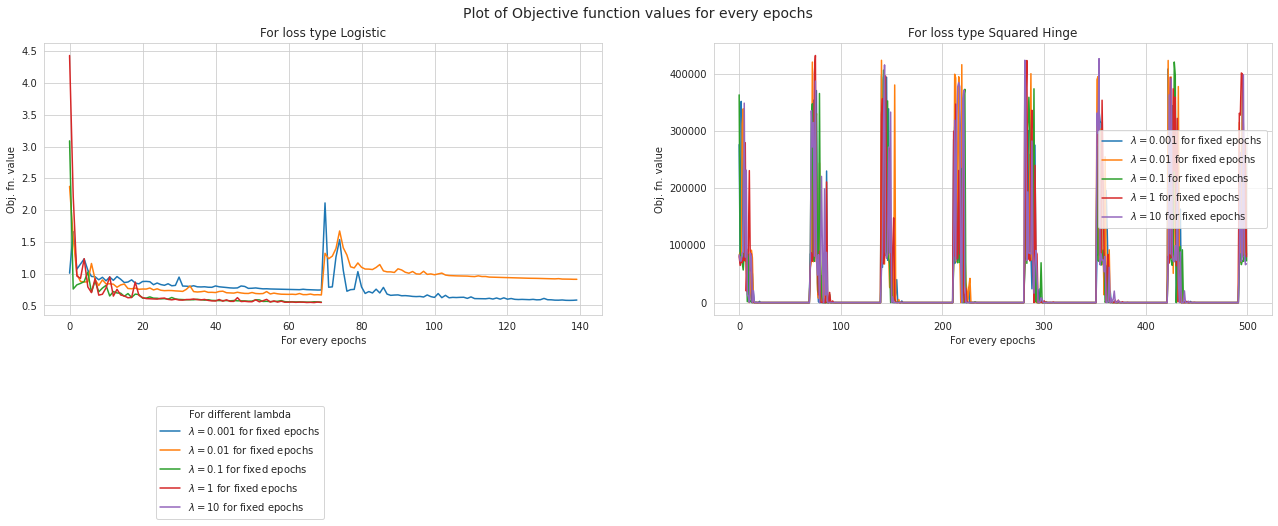

In [ ]:
loss_types = [logistic, sq_hinge]
loss_names = {logistic: 'Logistic', sq_hinge: 'Squared Hinge'}
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 500
eps = 1e-4
all_results = {}
#all_results2 = {}
fig, ax = plt.subplots(1,2, figsize = (22,5))
plt.suptitle("Plot of Objective function values for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    w_opt = {}
    fn_vals_array = {}
    weights_array_epochs = {}
    w_opt2 = {}
    fn_vals_array2 = {}
    weights_array_epochs2 = {}
    for lambda_val in lambda_array:
        w_opt[lambda_val], fn_vals_array[lambda_val], weights_array_epochs[lambda_val] = OPT1(train_data, train_label, lambda_val, epochs, loss)
        ax[i].plot(fn_vals_array[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        #w_opt2[lambda_val], fn_vals_array2[lambda_val], weights_array_epochs2[lambda_val] = OPT1_modified(train_data, train_label, lambda_val, loss, eps)
        #ax[i].plot(fn_vals_array2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    
    all_results[loss] = [w_opt, fn_vals_array, weights_array_epochs]
    #all_results2[loss] = [w_opt2, fn_vals_array2, weights_array_epochs2]

    plt.title(f"For loss type {loss}")
    ax[i].set_xlabel('For every epochs')
    ax[i].set_ylabel('Obj. fn. value')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1
plt.legend()
plt.show()

##*7: (b) Plotting the test set accuracy every epochss. Use different colors for different $\lambda$ values.*

##*Computing the test accuracy values for all loss functions*

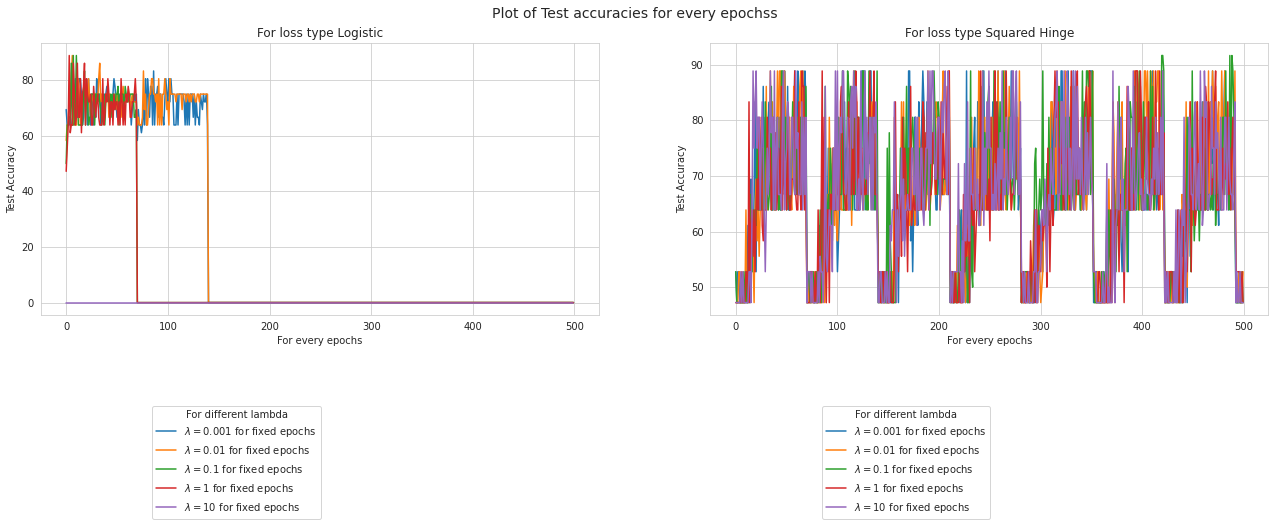

In [ ]:
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 500
all_test_accuracies = {}
#all_test_accuracies2 = {}
fig, ax = plt.subplots(1,2, figsize = (22,5))
plt.suptitle("Plot of Test accuracies for every epochss", fontsize = 14)
i = 0
for loss in loss_types:
    accuracy = {}
    #accuracy2 = {}
    
    for lambda_val in lambda_array:
        accuracy[lambda_val] = [0 for _ in range(len(all_results[loss][2][lambda_val]))] 
        #accuracy2[lambda_val] = [0 for _ in range(len(all_results2[loss][2][lambda_val]))]
        
        for j in range(len(all_results[loss][2][lambda_val])):
            accuracy[lambda_val][j] = compute_accuracy(test_data, test_label, all_results[loss][2][lambda_val][j])
        ax[i].plot(accuracy[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        
       # for j in range(len(all_results2[loss][2][lambda_val])):
       #     accuracy2[lambda_val][j] = compute_accuracy(test_data, test_label, all_results2[loss][2][lambda_val][j])
       # ax[i].plot(accuracy2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    
    all_test_accuracies[loss] = accuracy
    #all_test_accuracies2[loss] = accuracy2
    
    ax[i].set_xlabel('For every epochs')
    ax[i].set_ylabel('Test Accuracy')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1

plt.show()

##*7: (c) Plotting the train set accuracy for every epoch. Use different colors for different $\lambda$ values.*

##*Computing the train accuracy values for all loss functions*

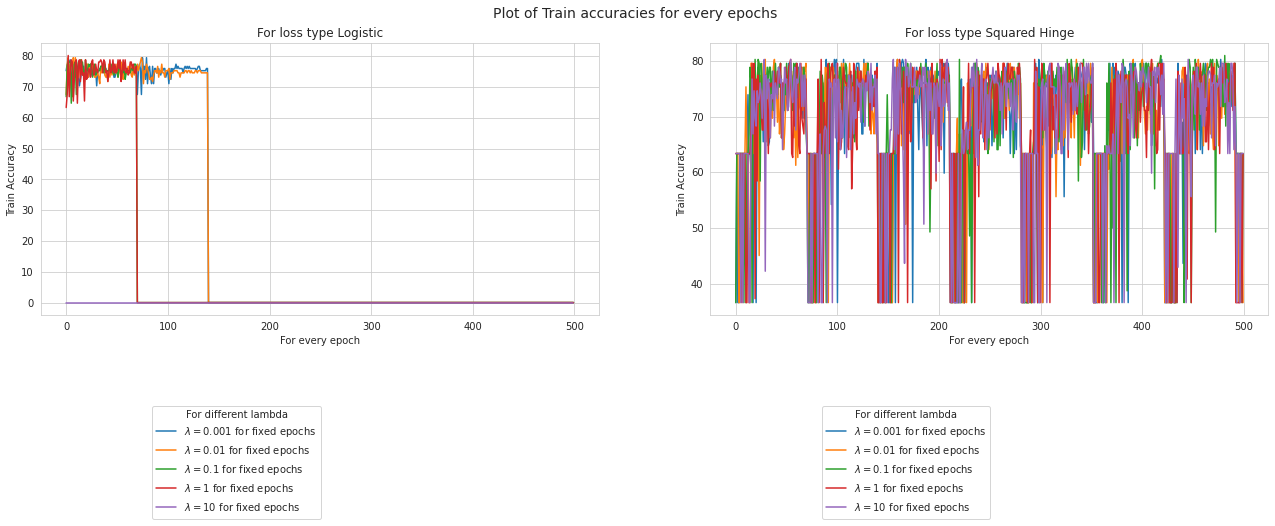

In [ ]:
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 500
all_train_accuracies = {}
#all_train_accuracies2 = {}
fig, ax = plt.subplots(1,2, figsize = (22,5))
plt.suptitle("Plot of Train accuracies for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    train_accuracy = {}
    #train_accuracy2 = {}

    for lambda_val in lambda_array:
        train_accuracy[lambda_val] = [0 for _ in range(len(all_results[loss][2][lambda_val]))]
        #train_accuracy2[lambda_val] = [0 for _ in range(len(all_results2[loss][2][lambda_val]))]
        
        for j in range(len(all_results[loss][2][lambda_val])):
            train_accuracy[lambda_val][j] = compute_accuracy(train_data, train_label, all_results[loss][2][lambda_val][j])
        ax[i].plot(train_accuracy[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        
       # for j in range(len(all_results2[loss][2][lambda_val])):
        #    train_accuracy2[lambda_val][j] = compute_accuracy(train_data, train_label, all_results2[loss][2][lambda_val][j])
       # ax[i].plot(train_accuracy2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    all_train_accuracies[loss] = train_accuracy
    #all_train_accuracies2[loss] = train_accuracy2

    ax[i].set_xlabel('For every epoch')
    ax[i].set_ylabel('Train Accuracy')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1
plt.show()

##*7: (d) Tabulating the final test set accuracy and train set accuracy for each $\lambda$ value.*

##*Tabulating the train and test accuracy values for each lambda values*

In [ ]:
i = 1
df_list = {}
#df_list2 = {}
for loss in loss_types:
    train_accuracy_final = [0 for _ in range(len(lambda_array))]
    test_accuracy_final = [0 for _ in range(len(lambda_array))]
   # train_accuracy_final2 = [0 for _ in range(len(lambda_array))]
   # test_accuracy_final2 = [0 for _ in range(len(lambda_array))]

    for j in range(len(lambda_array)):
        train_accuracy_final[j] = compute_accuracy(train_data, train_label, all_results[loss][0][lambda_array[j]])
        test_accuracy_final[j] = compute_accuracy(test_data, test_label, all_results[loss][0][lambda_array[j]])
        
        #train_accuracy_final2[j] = compute_accuracy(train_data, train_label, all_results2[loss][0][lambda_array[j]])
        #test_accuracy_final2[j] = compute_accuracy(test_data, test_label, all_results2[loss][0][lambda_array[j]])
    
    df_name = 'df' + str(i)
    df = pd.DataFrame(list(zip(lambda_array, train_accuracy_final, test_accuracy_final)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
    df.index = np.arange(1,len(lambda_array)+1)

    #df2 = pd.DataFrame(list(zip(lambda_array, train_accuracy_final2, test_accuracy_final2)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
    #df2.index = np.arange(1,len(lambda_array)+1)
    
    df_list[df_name] = df
    #df_list2[df_name] = df2
    i += 1

In [ ]:
from IPython.display import display_html

def mydisplay(dfs, names=[], main_heading = []):
    html_str = ''
    html_str += ('<tr>' + 
                     (f'<td style="text-align:center, vertical-align: center">{main_heading[0]}</td>') + 
                     '</tr>')
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [ ]:
print('\n')
print('\n')
mydisplay([df_list['df1'], df_list['df2']], ['For Logistic loss', 'For Squared Hinge loss'], ['For OPT1 with fixed number of epochs:'])
#print('\n')
#print('\n')
#mydisplay([df_list2['df1'], df_list2['df2']], ['For Hinge loss', 'For Squared Hinge loss'], ['For OPT1 modified with our stopping criterion:'])

For OPT1 with fixed number of epochs: For Logistic loss For Squared Hinge loss 
 
 
 
 Lambda 
 Train Accuracy 
 Test Accuracy 
 
 
 
 
 1 
 0.001 
 0.0 
 0.0 
 
 
 2 
 0.010 
 0.0 
 0.0 
 
 
 3 
 0.100 
 0.0 
 0.0 
 
 
 4 
 1.000 
 0.0 
 0.0 
 
 
 5 
 10.000 
 0.0 
 0.0 
 
 
 
 
 
 
 Lambda 
 Train Accuracy 
 Test Accuracy 
 
 
 
 
 1 
 0.001 
 63.380282 
 47.222222 
 
 
 2 
 0.010 
 36.619718 
 52.777778 
 
 
 3 
 0.100 
 63.380282 
 47.222222 
 
 
 4 
 1.000 
 63.380282 
 47.222222 
 
 
 5 
 10.000 
 63.380282 
 47.222222

##*7: (e) - Observations*

- Regarding test accuracies:
> * The test accuracies come out to be higher for the squred hinge function compared to 0 test accuracy in case of logistic function.
> * In case of squred hinge, test accuracies comes out to be higher (52.777778) for $\lambda= 0.01$ and lower(47.222222) for rest of the $\lambda$ values.
> * In case of Logistic, test accuracies comes out to be 0 for all values of $\lambda$.
- Regarding train accuracies:
> * The train accuracies come out to be higher for the squred hinge function compared to 0 test accuracy in case of logistic function.
> * In case of squred hinge, train accuracies comes out to be higher (63.380282) for $\lambda= 0.001, 0.1, 1, 10$ and lower(36.619718) for $\lambda= 0.01$
> * In case of Logistic, test accuracies comes out to be 0 for all values of $\lambda$.